## 1. 数据集

/opt/anaconda/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/anaconda/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


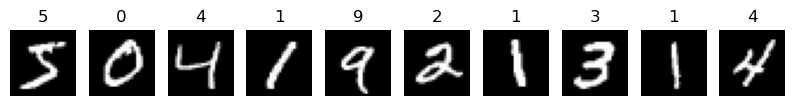

In [1]:
from data.data_handler import DataHandler
import matplotlib.pyplot as plt
import numpy as np

data = DataHandler(64)
images = data.train_data.dataset.data[:10]
labels = data.train_data.dataset.targets[:10]

images = np.array(images)

fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(labels[i].item())
plt.show()

## 2. 模型横向对比

### 2.1 LeNet

In [44]:
import torch
torch.cuda.empty_cache()
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100"

In [1]:
from train import Model
import time

lenet = Model(128, 5, 0.001, 0.5, "lenet", "adamw")

start_time = time.time()
lenet.train()
end_time = time.time()

print("training time: ", end_time - start_time)

/opt/anaconda/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/anaconda/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


===== Traning Info =====
Device: cuda
Model: lenet
Model Info:

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 24, 24]           156
├─Sigmoid: 1-2                           [-1, 6, 24, 24]           --
├─MaxPool2d: 1-3                         [-1, 6, 12, 12]           --
├─Conv2d: 1-4                            [-1, 16, 8, 8]            2,416
├─Sigmoid: 1-5                           [-1, 16, 8, 8]            --
├─MaxPool2d: 1-6                         [-1, 16, 4, 4]            --
├─Linear: 1-7                            [-1, 120]                 30,840
├─Sigmoid: 1-8                           [-1, 120]                 --
├─Linear: 1-9                            [-1, 84]                  10,164
├─Sigmoid: 1-10                          [-1, 84]                  --
├─Linear: 1-11                           [-1, 10]                  850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
Total mu

100%|██████████| 375/375 [00:06<00:00, 58.40it/s]


Train Epoch 1
Train set: 
Loss: 0.01398411733781298, Accuracy: 18470.0/48000(38.479200000000006 %)
Val set: 
Loss: 0.00516190113623937, Accuracy: 10083.0/12000(84.025 %)



100%|██████████| 375/375 [00:06<00:00, 59.40it/s]


Train Epoch 2
Train set: 
Loss: 0.0028926388385395207, Accuracy: 43274.0/48000(90.15419999999999 %)
Val set: 
Loss: 0.0019832240380346774, Accuracy: 11136.0/12000(92.80000000000001 %)



100%|██████████| 375/375 [00:06<00:00, 58.90it/s]


Train Epoch 3
Train set: 
Loss: 0.0014696027220537265, Accuracy: 45449.0/48000(94.6854 %)
Val set: 
Loss: 0.001425423610334595, Accuracy: 11346.0/12000(94.55 %)



100%|██████████| 375/375 [00:06<00:00, 59.92it/s]


Train Epoch 4
Train set: 
Loss: 0.0010518123244401068, Accuracy: 46111.0/48000(96.0646 %)
Val set: 
Loss: 0.0009798490141207973, Accuracy: 11562.0/12000(96.35000000000001 %)



100%|██████████| 375/375 [00:06<00:00, 59.89it/s]


Train Epoch 5
Train set: 
Loss: 0.0008519376091426238, Accuracy: 46473.0/48000(96.8187 %)
Val set: 
Loss: 0.0008342626745191713, Accuracy: 11610.0/12000(96.75 %)

Test set: 
Loss: 0.0007002249571029097, Accuracy: 9744.0/10000(97.44 %)

training time:  40.02324390411377


### 2.2 AlexNet

In [2]:
from train import Model
alexnet = Model(128, 5, 0.001, 0.5, "alexnet", "adamw")

start_time = time.time()
alexnet.train()
end_time = time.time()

print("training time: ", end_time - start_time)

===== Traning Info =====
Device: cuda
Model: alexnet
Model Info:

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 128, 7, 7]           --
|    └─Upsample: 2-1                     [-1, 1, 56, 56]           --
|    └─Conv2d: 2-2                       [-1, 48, 56, 56]          1,248
|    └─ReLU: 2-3                         [-1, 48, 56, 56]          --
|    └─MaxPool2d: 2-4                    [-1, 48, 28, 28]          --
|    └─Conv2d: 2-5                       [-1, 128, 28, 28]         153,728
|    └─ReLU: 2-6                         [-1, 128, 28, 28]         --
|    └─MaxPool2d: 2-7                    [-1, 128, 14, 14]         --
|    └─Conv2d: 2-8                       [-1, 192, 14, 14]         221,376
|    └─ReLU: 2-9                         [-1, 192, 14, 14]         --
|    └─Conv2d: 2-10                      [-1, 192, 14, 14]         331,968
|    └─ReLU: 2-11                        [-1, 192, 14, 14]         --
|

100%|██████████| 375/375 [02:09<00:00,  2.89it/s]


Train Epoch 1
Train set: 
Loss: 0.0021158735640347003, Accuracy: 43786.0/48000(91.2208 %)
Val set: 
Loss: 0.0005109710626614591, Accuracy: 11785.0/12000(98.20830000000001 %)



100%|██████████| 375/375 [02:10<00:00,  2.87it/s]


Train Epoch 2
Train set: 
Loss: 0.0005785378460859647, Accuracy: 46957.0/48000(97.8271 %)
Val set: 
Loss: 0.0003923339929897338, Accuracy: 11828.0/12000(98.5667 %)



100%|██████████| 375/375 [02:10<00:00,  2.88it/s]


Train Epoch 3
Train set: 
Loss: 0.0004782717157067964, Accuracy: 47129.0/48000(98.1854 %)
Val set: 
Loss: 0.00028810954575116436, Accuracy: 11874.0/12000(98.95 %)



100%|██████████| 375/375 [02:11<00:00,  2.86it/s]


Train Epoch 4
Train set: 
Loss: 0.00039514537013261966, Accuracy: 47292.0/48000(98.52499999999999 %)
Val set: 
Loss: 0.00029686173952844303, Accuracy: 11881.0/12000(99.0083 %)



100%|██████████| 375/375 [02:09<00:00,  2.89it/s]


Train Epoch 5
Train set: 
Loss: 0.0003464857793005649, Accuracy: 47363.0/48000(98.6729 %)
Val set: 
Loss: 0.00027542279144593824, Accuracy: 11879.0/12000(98.99170000000001 %)

Test set: 
Loss: 0.00021547183547263558, Accuracy: 9913.0/10000(99.13 %)

training time:  708.3815813064575


### 2.3 ResNet

In [4]:
resnet = Model(128, 5, 0.001, 0.5, "resnet", "adamw")

start_time = time.time()
resnet.train()
end_time = time.time()

print("training time: ", end_time - start_time)

===== Traning Info =====
Device: cuda
Model: resnet
Model Info:

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 1, 1]           --
|    └─Upsample: 2-1                     [-1, 1, 56, 56]           --
|    └─Conv2d: 2-2                       [-1, 64, 28, 28]          3,136
|    └─BatchNorm2d: 2-3                  [-1, 64, 28, 28]          128
|    └─ReLU: 2-4                         [-1, 64, 28, 28]          --
|    └─MaxPool2d: 2-5                    [-1, 64, 14, 14]          --
|    └─BasicBlock: 2-6                   [-1, 64, 14, 14]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 14, 14]          36,864
|    |    └─BatchNorm2d: 3-2             [-1, 64, 14, 14]          128
|    |    └─ReLU: 3-3                    [-1, 64, 14, 14]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 14, 14]          36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 14, 14]          128
|    |

100%|██████████| 375/375 [02:59<00:00,  2.08it/s]


Train Epoch 1
Train set: 
Loss: 0.001071652537890865, Accuracy: 46042.0/48000(95.9208 %)
Val set: 
Loss: 0.0006663009587985774, Accuracy: 11726.0/12000(97.7167 %)



100%|██████████| 375/375 [03:13<00:00,  1.94it/s]


Train Epoch 2
Train set: 
Loss: 0.00044453693726245546, Accuracy: 47215.0/48000(98.3646 %)
Val set: 
Loss: 0.000435546659398824, Accuracy: 11811.0/12000(98.425 %)



100%|██████████| 375/375 [03:16<00:00,  1.91it/s]


Train Epoch 3
Train set: 
Loss: 0.0003090830200320246, Accuracy: 47457.0/48000(98.86880000000001 %)
Val set: 
Loss: 0.0004363608357186119, Accuracy: 11810.0/12000(98.4167 %)



100%|██████████| 375/375 [03:17<00:00,  1.90it/s]


Train Epoch 4
Train set: 
Loss: 0.00028360929705741, Accuracy: 47507.0/48000(98.9729 %)
Val set: 
Loss: 0.0004579372573643923, Accuracy: 11813.0/12000(98.4417 %)



100%|██████████| 375/375 [03:15<00:00,  1.92it/s]


Train Epoch 5
Train set: 
Loss: 0.00023048236257151682, Accuracy: 47598.0/48000(99.1625 %)
Val set: 
Loss: 0.00027953476245359826, Accuracy: 11897.0/12000(99.1417 %)

Test set: 
Loss: 0.00019828542088562245, Accuracy: 9930.0/10000(99.3 %)

training time:  1012.8489742279053


### 2.4 MobileNet

In [8]:
mobilenet = Model(128, 5, 0.001, 0.5, "mobilenet", "adamw")

start_time = time.time()
mobilenet.train()
end_time = time.time()

print("training time: ", end_time - start_time)

===== Traning Info =====
Device: cuda
Model: mobilenet
Model Info:

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1024, 1, 1]          --
|    └─Upsample: 2-1                     [-1, 1, 56, 56]           --
|    └─Conv2d: 2-2                       [-1, 32, 28, 28]          288
|    └─BatchNorm2d: 2-3                  [-1, 32, 28, 28]          64
|    └─ReLU: 2-4                         [-1, 32, 28, 28]          --
|    └─DepthwiseSeparableConv: 2-5       [-1, 64, 28, 28]          --
|    |    └─Conv2d: 3-1                  [-1, 32, 28, 28]          288
|    |    └─BatchNorm2d: 3-2             [-1, 32, 28, 28]          64
|    |    └─ReLU: 3-3                    [-1, 32, 28, 28]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 28, 28]          2,048
|    |    └─BatchNorm2d: 3-5             [-1, 64, 28, 28]          128
|    |    └─ReLU: 3-6                    [-1, 64, 28, 28]          --
|    └─Dept

100%|██████████| 375/375 [02:13<00:00,  2.80it/s]


Train Epoch 1
Train set: 
Loss: 0.00291118817923901, Accuracy: 41944.0/48000(87.38329999999999 %)
Val set: 
Loss: 0.0008639835971407593, Accuracy: 11563.0/12000(96.3583 %)



100%|██████████| 375/375 [02:01<00:00,  3.08it/s]


Train Epoch 2
Train set: 
Loss: 0.0006048704423204375, Accuracy: 46868.0/48000(97.6417 %)
Val set: 
Loss: 0.0005766181896130244, Accuracy: 11746.0/12000(97.88329999999999 %)



100%|██████████| 375/375 [01:54<00:00,  3.28it/s]


Train Epoch 3
Train set: 
Loss: 0.00038038448255004674, Accuracy: 47307.0/48000(98.5563 %)
Val set: 
Loss: 0.0004952482649241574, Accuracy: 11787.0/12000(98.225 %)



100%|██████████| 375/375 [02:03<00:00,  3.05it/s]


Train Epoch 4
Train set: 
Loss: 0.00030726125288250234, Accuracy: 47419.0/48000(98.7896 %)
Val set: 
Loss: 0.0005083263519142444, Accuracy: 11799.0/12000(98.32499999999999 %)



100%|██████████| 375/375 [01:55<00:00,  3.25it/s]


Train Epoch 5
Train set: 
Loss: 0.00025363478747021873, Accuracy: 47553.0/48000(99.0688 %)
Val set: 
Loss: 0.0005847981168190017, Accuracy: 11754.0/12000(97.95 %)

Test set: 
Loss: 0.0004324719592448673, Accuracy: 9836.0/10000(98.36 %)

training time:  666.9487800598145


### 2.5 GoogleNet

In [33]:
googlenet = Model(128, 5, 0.001, 0.2, "googlenet", "adamw")

start_time = time.time()
googlenet.train()
end_time = time.time()

print("training time: ", end_time - start_time)

===== Traning Info =====
Device: cuda
Model: googlenet
Model Info:

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 14, 14]          --
|    └─Upsample: 2-1                     [-1, 1, 56, 56]           --
|    └─Conv2d: 2-2                       [-1, 64, 28, 28]          3,200
|    └─ReLU: 2-3                         [-1, 64, 28, 28]          --
|    └─MaxPool2d: 2-4                    [-1, 64, 14, 14]          --
├─Sequential: 1-2                        [-1, 192, 7, 7]           --
|    └─Conv2d: 2-5                       [-1, 64, 14, 14]          4,160
|    └─ReLU: 2-6                         [-1, 64, 14, 14]          --
|    └─Conv2d: 2-7                       [-1, 192, 14, 14]         110,784
|    └─ReLU: 2-8                         [-1, 192, 14, 14]         --
|    └─MaxPool2d: 2-9                    [-1, 192, 7, 7]           --
├─Sequential: 1-3                        [-1, 1024, 1, 1]          --
|    └

100%|██████████| 375/375 [01:57<00:00,  3.18it/s]


Train Epoch 1
Train set: 
Loss: 0.010369869309477508, Accuracy: 23821.0/48000(49.6271 %)
Val set: 
Loss: 0.0018033751087884109, Accuracy: 11206.0/12000(93.3833 %)



100%|██████████| 375/375 [02:06<00:00,  2.96it/s]


Train Epoch 2
Train set: 
Loss: 0.0010314033843266466, Accuracy: 46143.0/48000(96.1313 %)
Val set: 
Loss: 0.0008103156376940509, Accuracy: 11643.0/12000(97.02499999999999 %)



100%|██████████| 375/375 [02:09<00:00,  2.89it/s]


Train Epoch 3
Train set: 
Loss: 0.0006154281115353418, Accuracy: 46887.0/48000(97.6812 %)
Val set: 
Loss: 0.0006275777861786385, Accuracy: 11710.0/12000(97.5833 %)



100%|██████████| 375/375 [02:10<00:00,  2.87it/s]


Train Epoch 4
Train set: 
Loss: 0.0004439986320430762, Accuracy: 47211.0/48000(98.35629999999999 %)
Val set: 
Loss: 0.0005684352870254467, Accuracy: 11736.0/12000(97.8 %)



100%|██████████| 375/375 [02:09<00:00,  2.89it/s]


Train Epoch 5
Train set: 
Loss: 0.0003455357398997876, Accuracy: 47388.0/48000(98.725 %)
Val set: 
Loss: 0.0004067888509404535, Accuracy: 11823.0/12000(98.52499999999999 %)

Test set: 
Loss: 0.0003341736723232316, Accuracy: 9880.0/10000(98.8 %)

training time:  693.5630204677582


### 2.6 AlexNet(论文版本)

In [15]:
# alexnetlarge = Model(64, 5, 0.001, 0.5, "alexnetlarge", "adamw")

# start_time = time.time()
# alexnetlarge.train()
# end_time = time.time()

# print("training time: ", end_time - start_time)

### 2.7 结果

#### 2.7.1 验证集准确率随训练步数变化图

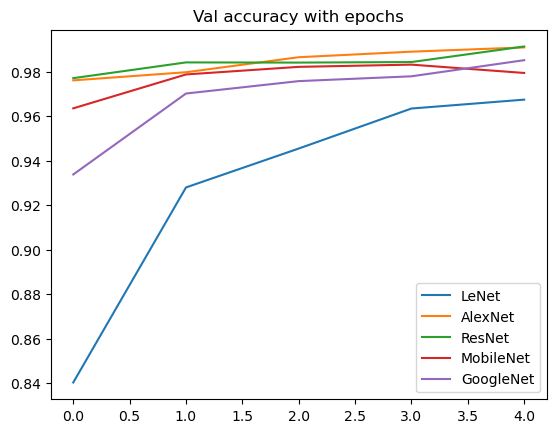

In [34]:
from matplotlib import pyplot as plt

plt.plot(lenet.val_accuracy, label="LeNet")
plt.plot(alexnet.val_accuracy, label="AlexNet")
plt.plot(resnet.val_accuracy, label="ResNet")
plt.plot(mobilenet.val_accuracy, label="MobileNet")
plt.plot(googlenet.val_accuracy, label="GoogleNet")

plt.legend()
plt.title("Val accuracy with epochs")

plt.show()

#### 2.7.2 训练集损失随每批次数据变化图

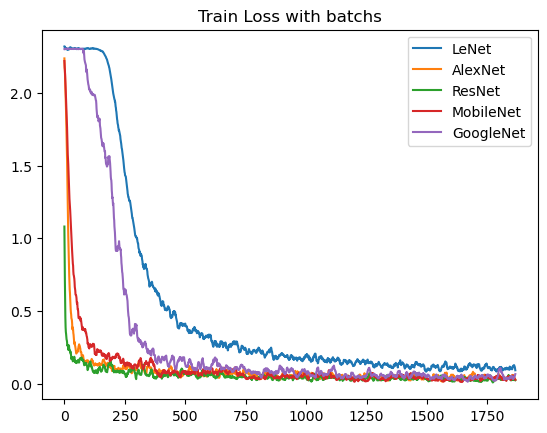

In [35]:
plt.plot(lenet.train_loss, label="LeNet")
plt.plot(alexnet.train_loss, label="AlexNet")
plt.plot(resnet.train_loss, label="ResNet")
plt.plot(mobilenet.train_loss, label="MobileNet")
plt.plot(googlenet.train_loss, label="GoogleNet")

plt.legend()
plt.title("Train Loss with batchs")

plt.show()